<a href="https://colab.research.google.com/github/hajime-8123/AI-Application-repository/blob/main/final_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**12300317: Eshonkulov Atkham -
Data Preprocessing and Exploration**

 Missing Values and Data Cleaning

In [32]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('supermarket_sales.csv')

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Verifying changes
print("\nAfter Handling Missing Values:")
print(df.isnull().sum())



Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

After Handling Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross incom

Categorical Variable Encoding

In [4]:
# Checking data types and unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())

# Verifying changes
print("\nAfter Categorical Variable Encoding:")
print(df.head())



Unique values for Invoice ID:
['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '23

Exploratory Data Analysis (EDA)



Summary Statistics:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.76

<ipython-input-5-d6d3656d4004>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


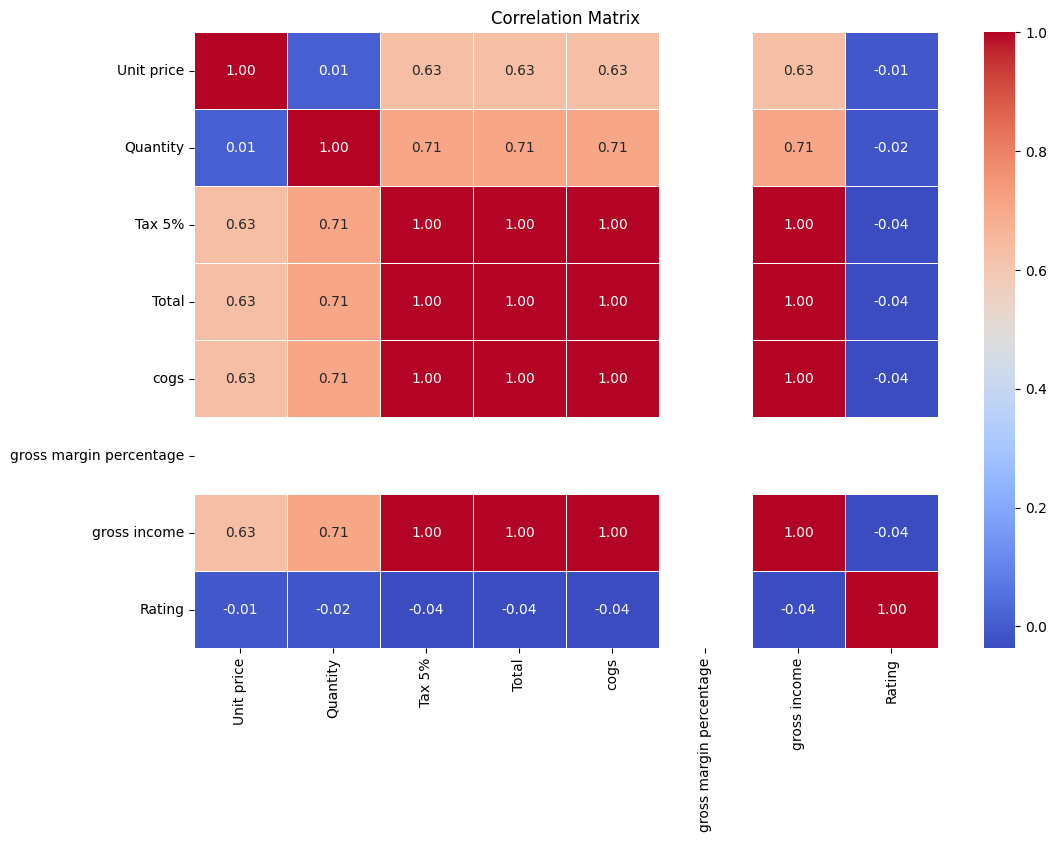

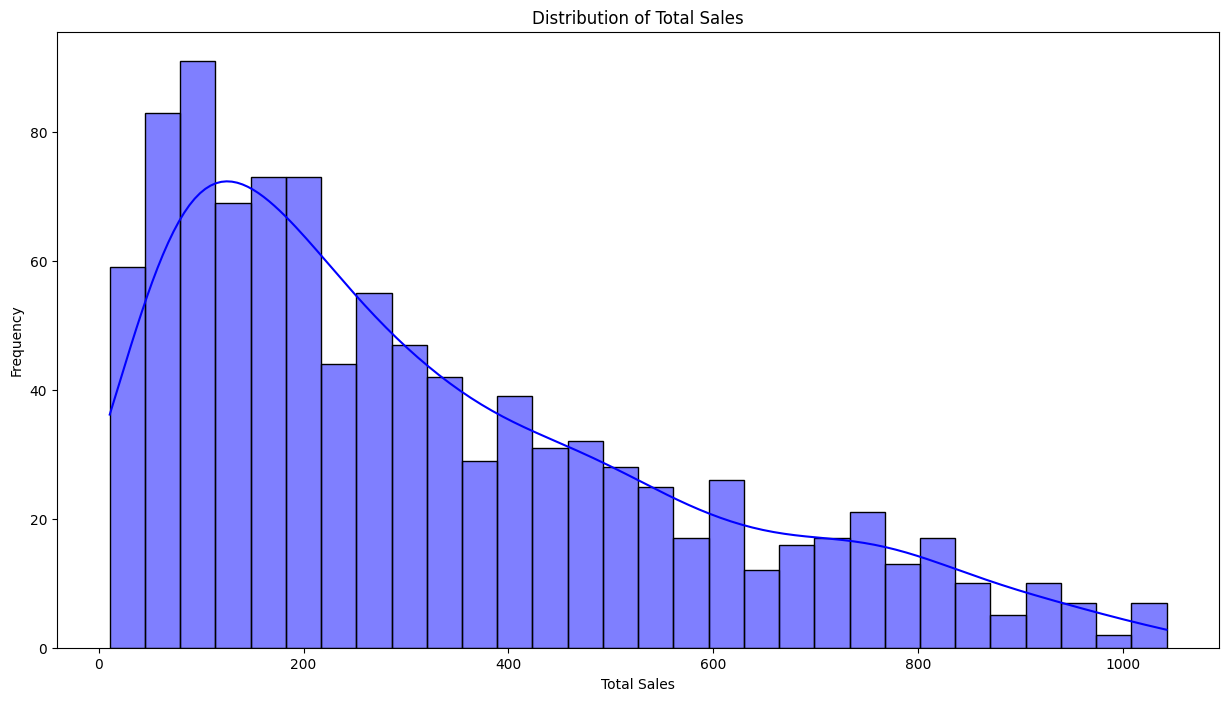

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
summary_statistics = df.describe()
print("\nSummary Statistics:")
print(summary_statistics)

# Visualize correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Explore distribution of key numerical features
plt.figure(figsize=(15, 8))
sns.histplot(df['Total'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


**Model Implementation**

Linear Regression

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 'Total' is the target variable
X = df.drop(['Total'], axis=1)  # Features
y = df['Total']  # Target variable

# Droping 'Invoice ID' column as it contains non-numeric values
X = X.drop(['Invoice ID'], axis=1)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Use ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Apply one-hot encoding to the dataset
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Continue with Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')


Linear Regression Mean Squared Error: 1.9048761634890604e-07


Decesion Tree Regression

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Create and train a decision tree regression model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = decision_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Mean Squared Error: {mse_tree}')


Decision Tree Mean Squared Error: 3.8435112450000077


Support Vector Regression

In [11]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse

# Feature scaling for SVR
scaler = StandardScaler(with_mean=not issparse(X_train))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train an SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR Mean Squared Error: {mse_svr}')


SVR Mean Squared Error: 71301.95320122517


CNN, KNN and RNN

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN

# Loading the dataset
df = pd.read_csv('supermarket_sales.csv')

# 'Total' is the target variable
X = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
y = df['Total']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

# 2. Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Mean Squared Error: {mse_tree}')

# 3. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR Mean Squared Error: {mse_svr}')

# 4. K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'KNN Mean Squared Error: {mse_knn}')

# 5. Convolutional Neural Network (CNN)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

mse_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f'CNN Mean Squared Error: {mse_cnn}')

# 6. Recurrent Neural Network (RNN)
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

mse_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print(f'RNN Mean Squared Error: {mse_rnn}')


Linear Regression Mean Squared Error: 8.985378145956995e-27
Decision Tree Mean Squared Error: 1.5275203650000027
SVR Mean Squared Error: 17740.77813722378
KNN Mean Squared Error: 5.874559478549993
Epoch 1/10
25/25 [==============================] - 4s 37ms/step - loss: 25361.1602 - val_loss: 416.9189
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 846.5751 - val_loss: 77.8763
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 73.8661 - val_loss: 20.1200
Epoch 4/10
25/25 [==============================] - 0s 11ms/step - loss: 8.4717 - val_loss: 4.1832
Epoch 5/10
25/25 [==============================] - 0s 11ms/step - loss: 3.2059 - val_loss: 2.6039
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 2.6902 - val_loss: 2.2974
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 2.3686 - val_loss: 2.0510
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 2.0670 - val_loss: 1.7294
Epoc

**Model Comparison and Reporting**

Model Performance Comparison

In [29]:
# Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regression
y_pred_tree = decision_tree_model.predict(X_test)

# Support Vector Regression (SVR)
y_pred_svr = svr_model.predict(X_test_scaled)
print("Number of features in X_train_scaled:", X_train_scaled.shape[1])
print("Number of features in X_test_scaled:", X_test_scaled.shape[1])
# K-Nearest Neighbors (KNN)
y_pred_knn = knn_model.predict(X_test)

# CNN
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
y_pred_cnn = model_cnn.predict(X_test_cnn)

# RNN
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = model_rnn.predict(X_test_rnn)

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_linear,
    'Decision Tree': y_pred_tree,
    'SVR': y_pred_svr,
    'KNN': y_pred_knn,
    'CNN': y_pred_cnn.flatten(),
    'RNN': y_pred_rnn.flatten()
})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())




Number of features in X_train_scaled: 8
Number of features in X_test_scaled: 8
7/7 [==============================] - 0s 5ms/step
       Actual  Linear Regression  Decision Tree         SVR       KNN  \
521  523.9710           523.9710        523.845  454.353400  524.1117   
737  616.9800           616.9800        620.739  430.300257  618.9561   
740  408.7335           408.7335        408.492  392.663430  405.1110   
660  135.3555           135.3555        135.576  166.242398  137.9217   
411   45.9270            45.9270         45.108  122.876159   46.4121   

            CNN         RNN  
521  524.351318  524.076904  
737  615.794617  616.546753  
740  408.490295  408.523834  
660  136.195602  135.042053  
411   46.369583   45.089294  


Mean Squared Error (Linear Regression): 8.985378145956995e-27
Mean Squared Error (Decision Tree): 1.5275203650000027
Mean Squared Error (SVR): 30535.573315571033
Mean Squared Error (KNN): 5.874559478549993
Mean Squared Error (CNN): 1.2640186373836857
Mean Squared Error (RNN): 0.56307673425195


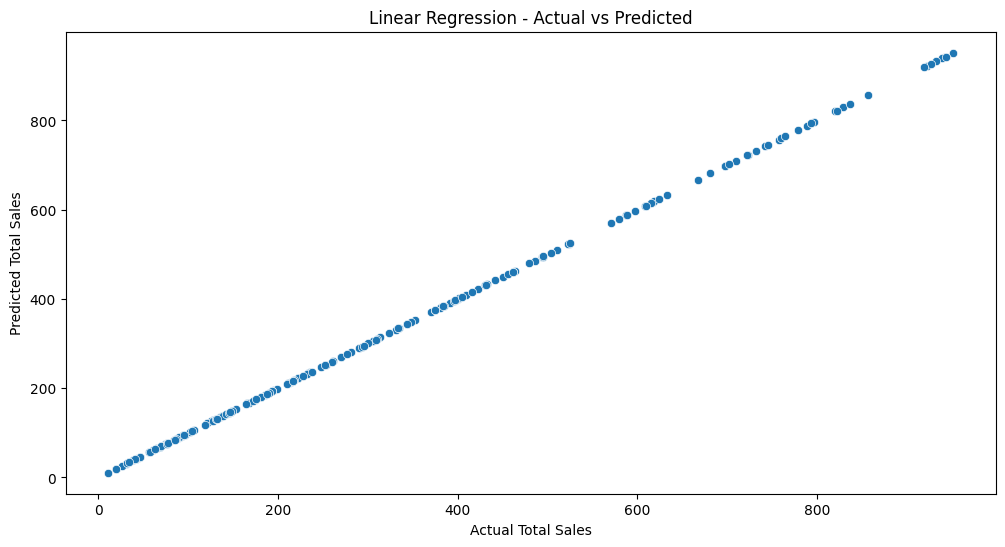

In [30]:
# Calculating and display evaluation metrics (e.g., Mean Squared Error)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Mean Squared Error (KNN): {mse_knn}')
print(f'Mean Squared Error (CNN): {mse_cnn}')
print(f'Mean Squared Error (RNN): {mse_rnn}')


# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='Linear Regression', data=comparison_df)
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()



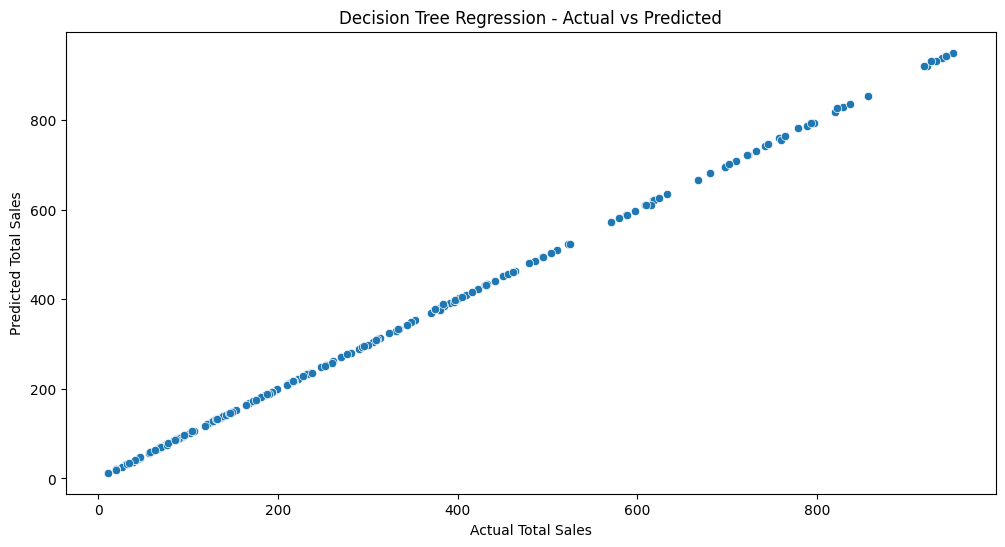

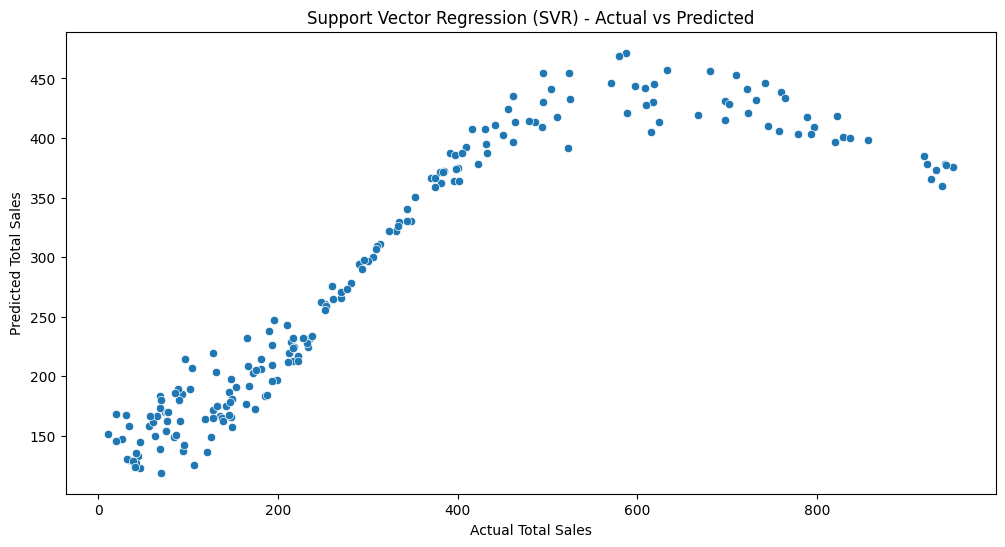

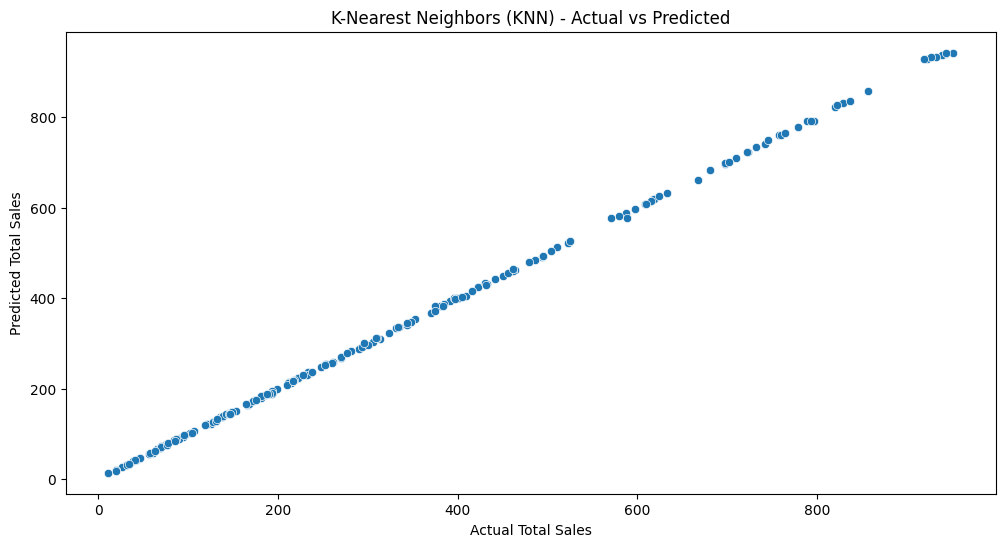

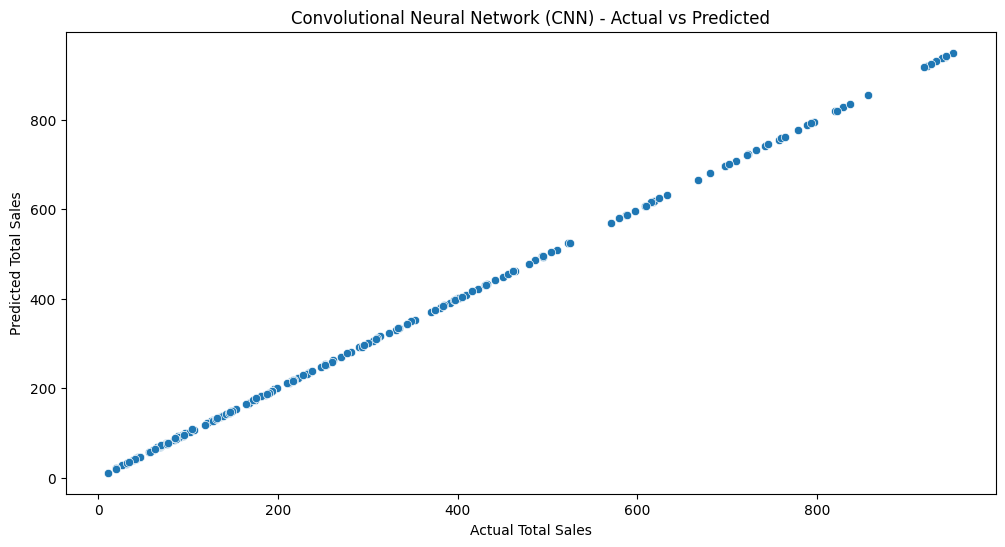

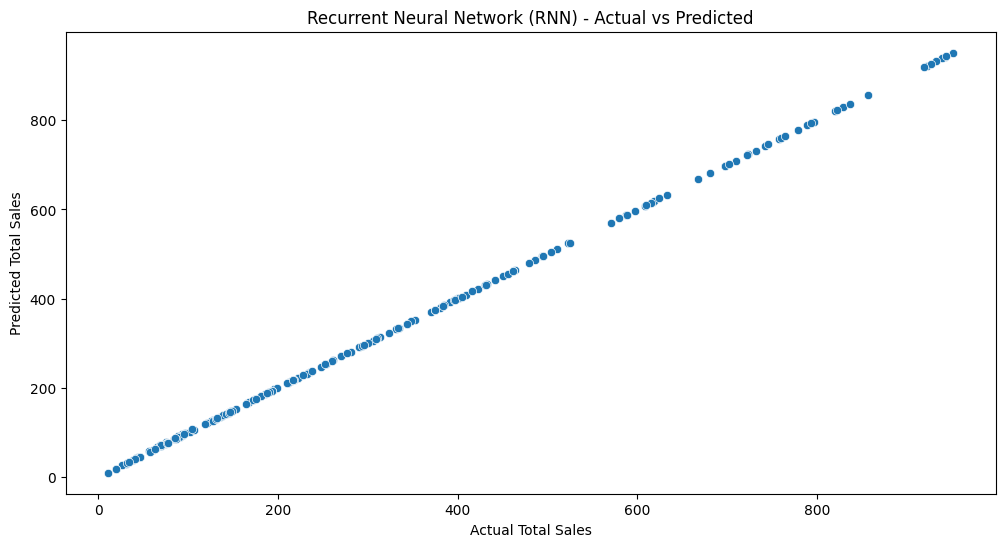

In [31]:
# Plotting actual vs predicted values for Decision Tree Regression
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='Decision Tree', data=comparison_df)
plt.title('Decision Tree Regression - Actual vs Predicted')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()

# Plotting actual vs predicted values for SVR
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='SVR', data=comparison_df)
plt.title('Support Vector Regression (SVR) - Actual vs Predicted')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()

# Plotting actual vs predicted values for KNN
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='KNN', data=comparison_df)
plt.title('K-Nearest Neighbors (KNN) - Actual vs Predicted')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()

# Plotting actual vs predicted values for CNN
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='CNN', data=comparison_df)
plt.title('Convolutional Neural Network (CNN) - Actual vs Predicted')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()

# Plotting actual vs predicted values for RNN
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual', y='RNN', data=comparison_df)
plt.title('Recurrent Neural Network (RNN) - Actual vs Predicted')
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.show()
